<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#图像二值化" data-toc-modified-id="图像二值化-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>图像二值化</a></span></li><li><span><a href="#Gamma-校正" data-toc-modified-id="Gamma-校正-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gamma 校正</a></span><ul class="toc-item"><li><span><a href="#1" data-toc-modified-id="1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1</a></span></li><li><span><a href="#2" data-toc-modified-id="2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2</a></span></li><li><span><a href="#3" data-toc-modified-id="3-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>3</a></span></li><li><span><a href="#时间测试" data-toc-modified-id="时间测试-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>时间测试</a></span></li></ul></li><li><span><a href="#直方图均衡化" data-toc-modified-id="直方图均衡化-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>直方图均衡化</a></span><ul class="toc-item"><li><span><a href="#课内代码" data-toc-modified-id="课内代码-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>课内代码</a></span></li><li><span><a href="#优化" data-toc-modified-id="优化-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>优化</a></span></li><li><span><a href="#时间测试" data-toc-modified-id="时间测试-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>时间测试</a></span></li></ul></li><li><span><a href="#卷积" data-toc-modified-id="卷积-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>卷积</a></span><ul class="toc-item"><li><span><a href="#课内" data-toc-modified-id="课内-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>课内</a></span></li><li><span><a href="#作业" data-toc-modified-id="作业-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>作业</a></span></li><li><span><a href="#滤波" data-toc-modified-id="滤波-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>滤波</a></span></li></ul></li><li><span><a href="#频率域图像增强" data-toc-modified-id="频率域图像增强-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>频率域图像增强</a></span><ul class="toc-item"><li><span><a href="#傅里叶变化" data-toc-modified-id="傅里叶变化-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>傅里叶变化</a></span><ul class="toc-item"><li><span><a href="#一维离散傅里叶变换" data-toc-modified-id="一维离散傅里叶变换-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>一维离散傅里叶变换</a></span></li><li><span><a href="#分析" data-toc-modified-id="分析-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>分析</a></span></li></ul></li></ul></li><li><span><a href="#图像去模糊" data-toc-modified-id="图像去模糊-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>图像去模糊</a></span></li><li><span><a href="#振铃效应" data-toc-modified-id="振铃效应-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>振铃效应</a></span></li><li><span><a href="#图像形态学" data-toc-modified-id="图像形态学-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>图像形态学</a></span><ul class="toc-item"><li><span><a href="#膨胀与腐蚀" data-toc-modified-id="膨胀与腐蚀-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>膨胀与腐蚀</a></span></li><li><span><a href="#Hit-or-Miss" data-toc-modified-id="Hit-or-Miss-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Hit or Miss</a></span></li><li><span><a href="#五线谱提取" data-toc-modified-id="五线谱提取-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>五线谱提取</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import imageio
import PIL
import matplotlib.pyplot as plt
import cv2 as cv
import random
from tqdm import tqdm_notebook
from numba import vectorize, jit
from collections import Counter
from skimage import data 

In [2]:
img = imageio.imread('imageio:chelsea.png')

# 图像二值化

**二值化函数**  
$$
BinImg = ImThresh(img, minv, maxv)\\
BinImg = ImThresh(img, threshold)
$$

In [11]:
tmp = np.array([[0,3,5,6,2,1],
                [1,2,3,4,5,6]])
np.where((tmp>=2)&(tmp<=5), 1, 0)

In [41]:
@jit
def ImThresh(img, minv, maxv):
    return np.where((img >= minv) & (img <= maxv), 1, 0)

In [42]:
@vectorize
def ImThresh1(x, minv, maxv):
    return int(minv <= x <= maxv)

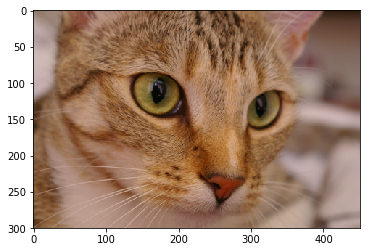

In [59]:
img = imageio.imread('imageio:chelsea.png')
plt.imshow(img)

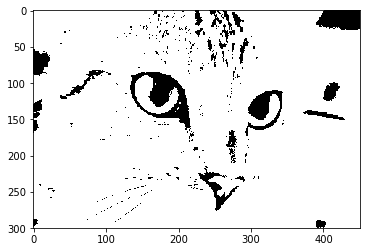

In [60]:
binimg = ImThresh(img, 100, 200)
plt.imshow(binimg[:, :, 0], cmap='gray')

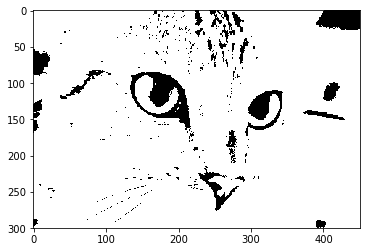

In [61]:
binimg = ImThresh1(img, 100, 200)
plt.imshow(binimg[:, :, 0], cmap='gray')

# Gamma 校正

$$
v' = f(v)
$$

## 1

In [174]:
def LUT(img, lutTable):
    lut = lambda x: lutTable[x]
    return lut(img)

def GammaTable(gamma):
    invGamma = 1.0 / gamma
#     table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype(np.uint8)
    table = np.arange(0, 256)
    for i in range(len(table)):
        table[i] = ((table[i] / 255.0) ** invGamma) * 255
    return table.astype(np.uint8)

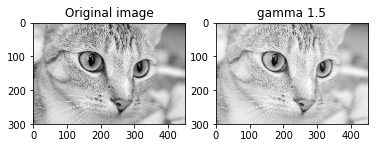

In [175]:
ax = plt.subplot(1, 2, 1)
plt.imshow(img[:, :, 0], cmap='gray')
ax.set_title('Original image')
ax = plt.subplot(1, 2, 2)
plt.imshow(LUT(img[:, :, 0], GammaTable(1.5)), cmap='gray')
ax.set_title('gamma 1.5')
plt.show()

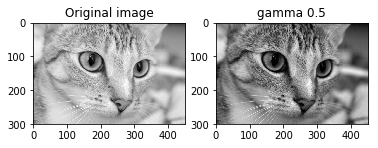

In [64]:
ax = plt.subplot(1, 2, 1)
plt.imshow(img[:, :, 0], cmap='gray')
ax.set_title('Original image')
ax = plt.subplot(1, 2, 2)
plt.imshow(LUT(img[:, :, 0], GammaTable(0.5)), cmap='gray')
ax.set_title('gamma 0.5')
plt.show()

## 2

In [85]:
def LUT1(img, gamma, lutTable):
    return lutTable(img, gamma).astype(np.uint8)

@vectorize
def GammaTable1(x, gamma):
    invGamma = 1.0 / gamma
    x_change = ((x / 255.0) ** invGamma) * 255
    return x_change

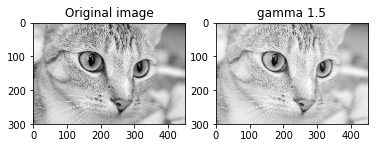

In [86]:
ax = plt.subplot(1, 2, 1)
plt.imshow(img[:, :, 0], cmap='gray')
ax.set_title('Original image')
ax = plt.subplot(1, 2, 2)
plt.imshow(LUT1(img[:, :, 0], 1.5, GammaTable1), cmap='gray')
ax.set_title('gamma 1.5')
plt.show()

## 3

In [183]:
def LUT2(img, lutTable):
    ans = lutTable[img]
    return ans

def GammaTable2(gamma):
    invGamma = 1.0 / gamma
    table = np.arange(0, 256)
    table = (((table / 255.0) ** invGamma) * 255).astype(np.uint8)
    return table

In [153]:
sum(GammaTable2(1.5) == GammaTable(1.5))

256

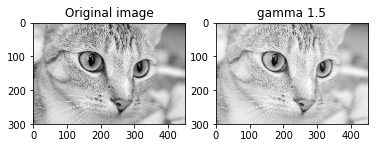

In [180]:
ax = plt.subplot(1, 2, 1)
plt.imshow(img[:, :, 0], cmap='gray')
ax.set_title('Original image')
ax = plt.subplot(1, 2, 2)
plt.imshow(LUT2(img[:, :, 0], GammaTable2(1.5)), cmap='gray')
ax.set_title('gamma 1.5')
plt.show()

## 时间测试

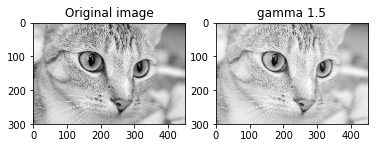

In [155]:
for i in range(100):
    ax = plt.subplot(1, 2, 1)
    plt.imshow(img[:, :, 0], cmap='gray')
    ax.set_title('Original image')
    ax = plt.subplot(1, 2, 2)
    plt.imshow(LUT(img[:, :, 0], GammaTable(1.5)), cmap='gray')
    ax.set_title('gamma 1.5')

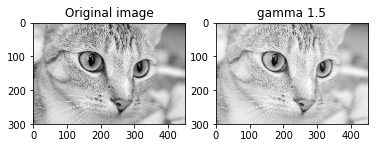

In [121]:
for i in range(100):
    ax = plt.subplot(1, 2, 1)
    plt.imshow(img[:, :, 0], cmap='gray')
    ax.set_title('Original image')
    ax = plt.subplot(1, 2, 2)
    plt.imshow(LUT1(img[:, :, 0], 1.5, GammaTable1), cmap='gray')
    ax.set_title('gamma 1.5')

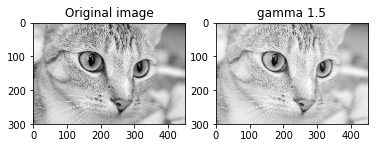

In [184]:
for i in range(100):
    ax = plt.subplot(1, 2, 1)
    plt.imshow(img[:, :, 0], cmap='gray')
    ax.set_title('Original image')
    ax = plt.subplot(1, 2, 2)
    plt.imshow(LUT2(img[:, :, 0], GammaTable2(1.5)), cmap='gray')
    ax.set_title('gamma 1.5')

先打表所耗时间较少

# 直方图均衡化

## 课内代码

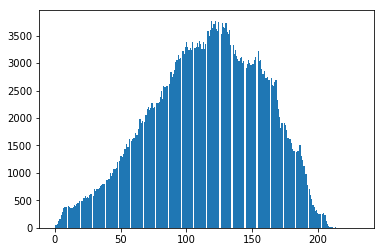

In [48]:
flat = img.flatten()
hist = plt.hist(flat, bins=255)
plt.show()

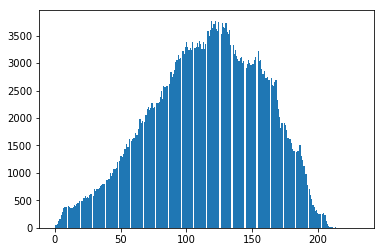

In [63]:
flat = img.flatten()
hist = plt.hist(flat, bins=255)
plt.show()

In [65]:
hist[0][0:50]

array([  47.,   44.,   69.,  117.,  156.,  240.,  292.,  367.,  373.,
        372.,    0.,  404.,  377.,  355.,  360.,  378.,  413.,  399.,
        441.,  443.,  494.,    0.,  494.,  493.,  538.,  582.,  552.,
        566.,  549.,  592.,  614.,    0.,  586.,  701.,  664.,  711.,
        703.,  728.,  770.,  779.,  797.,  789.,    0.,  869.,  873.,
        898.,  993.,  947., 1005., 1065.])

In [66]:
hist[1][0:50]

array([ 0.        ,  0.90588235,  1.81176471,  2.71764706,  3.62352941,
        4.52941176,  5.43529412,  6.34117647,  7.24705882,  8.15294118,
        9.05882353,  9.96470588, 10.87058824, 11.77647059, 12.68235294,
       13.58823529, 14.49411765, 15.4       , 16.30588235, 17.21176471,
       18.11764706, 19.02352941, 19.92941176, 20.83529412, 21.74117647,
       22.64705882, 23.55294118, 24.45882353, 25.36470588, 26.27058824,
       27.17647059, 28.08235294, 28.98823529, 29.89411765, 30.8       ,
       31.70588235, 32.61176471, 33.51764706, 34.42352941, 35.32941176,
       36.23529412, 37.14117647, 38.04705882, 38.95294118, 39.85882353,
       40.76470588, 41.67058824, 42.57647059, 43.48235294, 44.38823529])

In [67]:
hist[1]

array([  0.        ,   0.90588235,   1.81176471,   2.71764706,
         3.62352941,   4.52941176,   5.43529412,   6.34117647,
         7.24705882,   8.15294118,   9.05882353,   9.96470588,
        10.87058824,  11.77647059,  12.68235294,  13.58823529,
        14.49411765,  15.4       ,  16.30588235,  17.21176471,
        18.11764706,  19.02352941,  19.92941176,  20.83529412,
        21.74117647,  22.64705882,  23.55294118,  24.45882353,
        25.36470588,  26.27058824,  27.17647059,  28.08235294,
        28.98823529,  29.89411765,  30.8       ,  31.70588235,
        32.61176471,  33.51764706,  34.42352941,  35.32941176,
        36.23529412,  37.14117647,  38.04705882,  38.95294118,
        39.85882353,  40.76470588,  41.67058824,  42.57647059,
        43.48235294,  44.38823529,  45.29411765,  46.2       ,
        47.10588235,  48.01176471,  48.91764706,  49.82352941,
        50.72941176,  51.63529412,  52.54117647,  53.44705882,
        54.35294118,  55.25882353,  56.16470588,  57.07

In [69]:
(flat.max() - flat.min()) / 255

0.9058823529411765

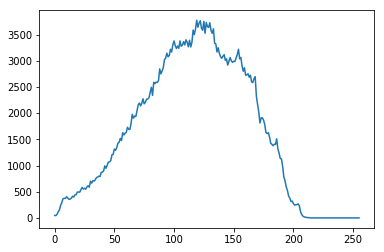

In [98]:
def get_histogram(img, bins):
    
    histogram = np.zeros(bins)
    for pixel in img:
        histogram[pixel] += 1
        
    return histogram

hist = get_histogram(flat, 256)
plt.plot(hist)
plt.show()

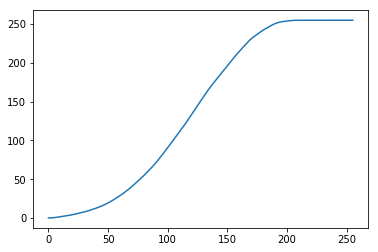

In [99]:
def cumsum(a):
    rst = np.zeros(a.shape)
    num = np.sum(a)
    a = a / num
    rst[0] = a[0]
    for i in range(1, len(a)):
        rst[i] = rst[i-1] + a[i]
    return rst

cs = cumsum(hist) * 255
plt.plot(cs)
plt.show()

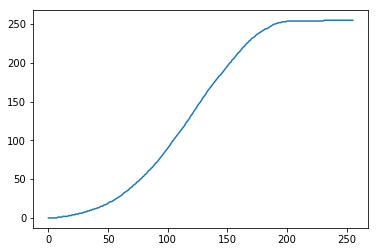

In [100]:
cs = cs.astype('uint8')
plt.plot(cs)
plt.show()

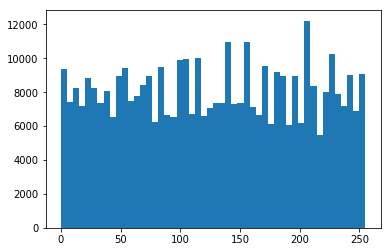

In [101]:
img_new = cs[flat]
plt.hist(img_new, bins=50)
plt.show()

In [102]:
img_new

array([183, 133,  99, ..., 218, 173, 151], dtype=uint8)

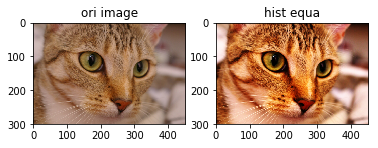

In [103]:
img_new = np.reshape(img_new, img.shape)
ax = plt.subplot(121)
plt.imshow(img, cmap='gray')
ax.set_title('ori image')
ax = plt.subplot(122)
plt.imshow(img_new, cmap='gray')
ax.set_title('hist equa')
plt.show()

## 优化

In [4]:
flat = img.flatten()

In [38]:
def get_histogram1(img, bins):
    
    histogram = np.zeros(bins)
    for pixel in np.arange(0, bins, 1):
        histogram[pixel] = len(img[img==pixel])
        
    return histogram

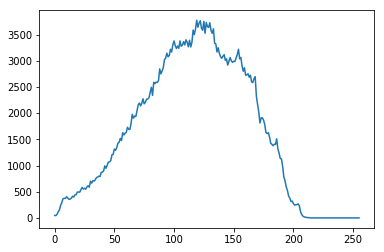

In [46]:
hist1 = get_histogram1(flat, 256)
plt.plot(hist)

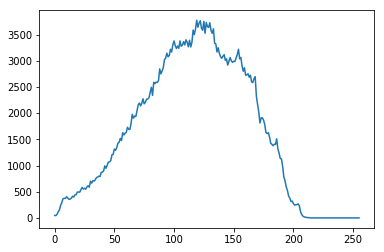

In [14]:
def get_histogram2(img, bins):
    
    tmp = Counter(img)
    histogram = np.zeros(bins)
    key = tmp.keys()
    for pixel in key:
        histogram[pixel] += len(img[img==pixel])
        
    return histogram
hist = get_histogram2(flat, 256)
plt.plot(hist)

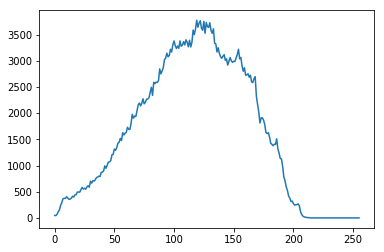

In [104]:
def get_histogram3(img, bins):
    
    histogram, bin_deges = np.histogram(flat, bins=range(bins+1))
    
    return histogram
hist = get_histogram3(flat, 256)
plt.plot(hist)

## 时间测试

In [16]:
for i in tqdm_notebook(range(100)):
    get_histogram(flat, 255)

In [17]:
for i in tqdm_notebook(range(100)):
    get_histogram1(flat, 255)

In [18]:
for i in tqdm_notebook(range(100)):
    get_histogram2(flat, 255)

In [105]:
for i in tqdm_notebook(range(100)):
    get_histogram3(flat, 255)

# 卷积

对图像做平滑、锐化  
卷积：
    + 核 kernel（小矩阵）
    + 点积

相关

$$
 g(x, y) = \sum^{a}_{s=-a}\sum^{b}_{t=-b}w(s, t)f(x+s,y+t)
$$

卷积

$$
 g(x, y) = \sum^{a}_{s=-a}\sum^{b}_{t=-b}w(s, t)f(x-s,y-t)
$$

## 课内

In [3]:
im = data.moon()

In [16]:
amount = 0.004
s_vs_p = 0.5
im_shape = im.shape
mask = np.random.choice((0, 1, 2), size=(im_shape[0], im_shape[1], 1), p=[1 - amount, amount * (1 - s_vs_p), amount * s_vs_p])
np.repeat(mask, 2, axis=2).shape

(512, 512, 2)

In [33]:
def noisy(noise_type, img):
    im_shape = img.shape
    if noise_type == 'gauss':
        mean = 0
        var = 0.1
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, im_shape)
        gauss = gauss.reshape(im_shape)
        _noisy = img + gauss
        return _noisy
    elif noise_type == 's&p':
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(img)
        try:
            mask = np.random.choice((0, 1, 2), size=(im_shape[0], im_shape[1], im_shape[2]), p=[1 - amount, amount * s_vs_p, amount * (1 - s_vs_p)])
            mask = np.repeat(mask, im_shape[2], axis=2)
        except:
            mask = np.random.choice((0, 1, 2), size=(im_shape[0], im_shape[1]), p=[1 - amount, amount * (1 - s_vs_p), amount * s_vs_p])
#         num_salt = np.ceil(amount * img.size * s_vs_p)
#         coords = [np.random.randint(0, i - 1, int(num_salt)) for i in im_shape]
#         out[coords] = 1
#         num_pepper = np.ceil(amount * img.size * (1 - s_vs_p))
#         coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in im_shape]
#         out[coords] = 0
        out[mask == 1] = 1
        out[mask == 2] = 0
        return out
    elif noise_type == 'poisson':
        vals = len(np.unique(img))
        vals = 2 ** np.ceil(np.log2(vals))
        _noisy = np.random.poisson(img * vals) / float(vals)
        return _noisy
    elif noise_type == 'speckle':
        gauss = np.random.randn(im_shape)
        gauss = gauss.reshape(im_shape)
        _noisy = img + img * gauss
        return _noisy


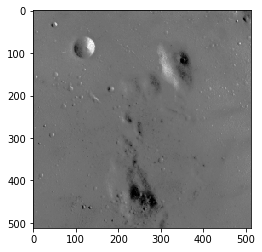

In [4]:
plt.imshow(im, cmap='gray')

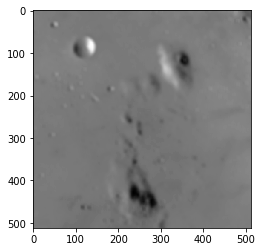

In [19]:
kernel = np.ones((9, 9), np.float32) / 81
dst = cv.filter2D(im, -1, kernel)
plt.imshow(dst, cmap='gray')

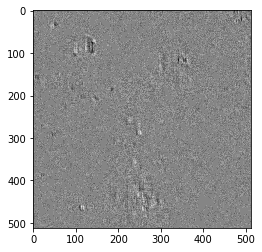

In [20]:
laplacian = cv.Laplacian(dst, cv.CV_64F)
plt.imshow(laplacian, cmap='gray')

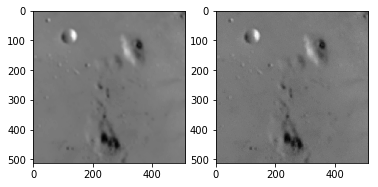

In [21]:
dst2 = dst - laplacian
plt.subplot(121)
plt.imshow(dst, cmap='gray')
plt.subplot(122)
plt.imshow(dst2, cmap='gray') 

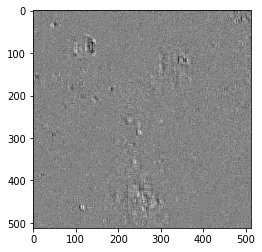

In [24]:
KLaplacian = np.array([[1, 1, 1],
                       [1, -8, 1],
                       [1, 1, 1]])
laplacian2 = cv.filter2D(dst.astype(np.float32), -1, KLaplacian)
plt.imshow(laplacian2, cmap='gray')

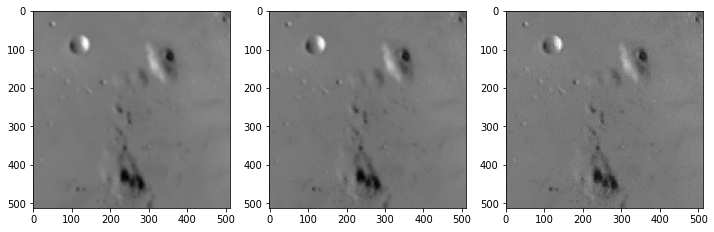

In [29]:
plt.figure(figsize=(12, 15))
dst3 = dst - laplacian2
plt.subplot(131);plt.imshow(dst, cmap='gray')
plt.subplot(132);plt.imshow(dst2, cmap='gray')
plt.subplot(133);plt.imshow(dst3, cmap='gray') 

In [30]:
err = laplacian - laplacian2
np.sum(np.abs(err))

282422.0

## 作业

In [34]:
img_noise = noisy('s&p', im)
kernel_sizes=list(range(3,10,2))
results=[]
for kernel_size in kernel_sizes:
    kernel=np.ones((kernel_size,kernel_size),np.float32)/kernel_size**2
    dst=cv.filter2D(img_noise,-1,kernel)
    results.append({'kernel_size':kernel_size,'result_img':dst})

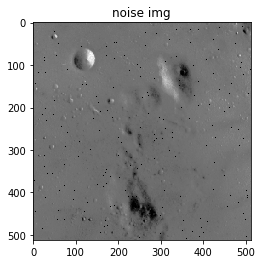

In [44]:
plt.title('noise img')
plt.imshow(img_noise, cmap='gray')
plt.savefig('noise_imt.jpg')
plt.show()

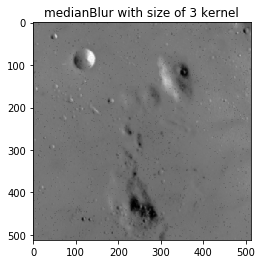

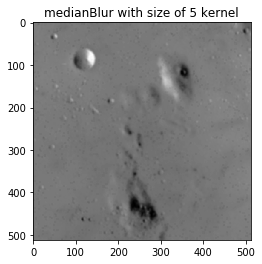

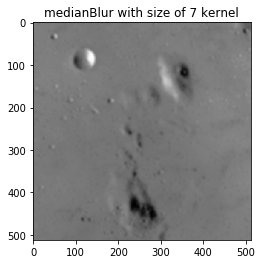

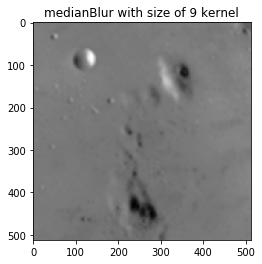

In [43]:
for result in results:
    plt.title('medianBlur with size of {} kernel'.format(result['kernel_size']))
    plt.imshow(result['result_img'], cmap='gray')
    plt.savefig('medianBlur with size of {} kernel.jpg'.format(result['kernel_size']))
    plt.show()

## 滤波

In [56]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """
    input_data : 由（数据量，通道，高，长）的4维数组构成的输入数据 
    filter_h : 滤波器的高 
    filter_w : 滤波器的长 
    stride : 步幅 
    pad : 填充
    """
    N = 1
    img = input_data.transpose(2, 0, 1)
    C, H, W = img.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(img, [(0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, C, -1)
    return col

def nonlinearFilter(img_, kernel_size=3, method=np.max, pad=0, show=False):
    """
    非线性滤波
    @param: img_:原始图像(单通道)
    @param: kernel_size:卷积核大小，为一个奇数
    @param: method:卷积时的计算方法
    @param: show:是否显示滤波结果
    """
    m, n, c = img_.shape
    s = kernel_size
    
    out_h = int(1 + (m + 2 * pad - s) / 1)
    out_w = int(1 + (n + 2 * pad - s) / 1)
    # 平滑滤波
    res = img_.copy()
    col = im2col(res, s, s, 1, pad)
    out = method(col, axis=2).reshape(out_h, out_w, -1).astype(int)
    
    if show:
        plt.imshow(out)
        plt.show()
    return res

# 频率域图像增强

## 傅里叶变化

### 一维离散傅里叶变换
$$
\tilde{F}(\mu) = \int_{-\infty}^{\infty}\tilde{f}(t)e^{-j2 \pi \mu t}dt
$$

空间域卷积相当于频率域乘积

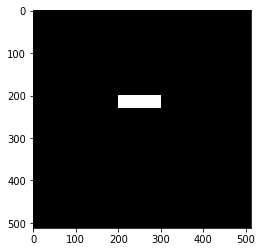

In [60]:
im = np.zeros((512, 512), dtype=np.uint8)
im[200:230, 200:300] = 255
plt.imshow(im, cmap='gray')

size of F (512, 512)
type of F's value <class 'numpy.complex128'>


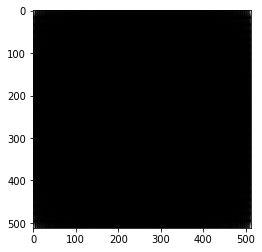

In [61]:
F = np.fft.fft2(im)
print('size of F', F.shape)
print("type of F's value", type(F[0, 0]))
S = np.abs(F)
plt.imshow(S, cmap='gray')

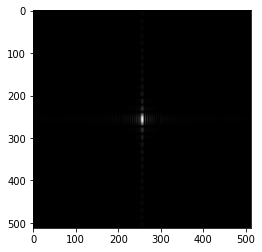

In [74]:
Fs = np.fft.fftshift(F)
S = np.abs(Fs)
plt.imshow(S, cmap='gray')

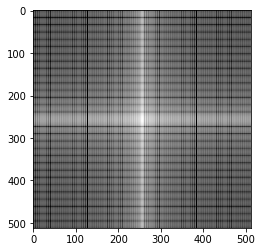

In [75]:
S2 = np.log(1 + S)
plt.imshow(S2, cmap='gray')

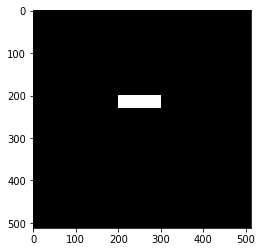

In [76]:
iFs = np.fft.ifftshift(Fs)
f_ = np.fft.ifft2(iFs)
im_ = np.abs(f_)
plt.imshow(im_, cmap='gray')

In [80]:
err = im_ - im
np.max(np.abs(err))

1.1368683772161603e-13

这里可以看到，将图片进行傅里叶变换再逆变换回来会存在有误差，尽管很小

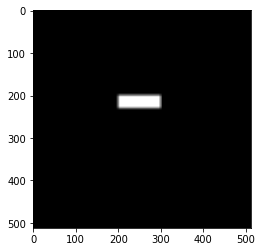

In [82]:
K = np.ones((9, 9)) / 81
im_blur = cv.filter2D(im, -1, K)
plt.imshow(im_blur, cmap='gray')

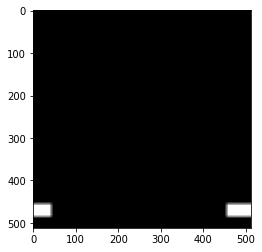

In [192]:
K_pad = np.zeros(im.shape)
offset = int((im.shape[0] - K.shape[0]) / 2)
K_pad[offset:offset + K.shape[0], offset:offset + K.shape[0]] = K
# K_pad[:K.shape[0], :K.shape[0]] = K
# K_pad[offset:offset + K.shape[0], :K.shape[0]] = K

F_K = np.fft.fft2(K_pad)
D = F_K * F
tmp = np.fft.ifft2(D)
# tmp = np.fft.fftshift(np.fft.ifft2(D))
im_D = np.real(tmp)

plt.imshow(im_D, cmap='gray')

pdf里有个问题，就是为什么要使用fftshift,上面注释的地方，经过分析感觉只是跟fft之后符号分布有关

### 分析

In [86]:
K_pad

array([[0.01234568, 0.01234568, 0.01234568, ..., 0.        , 0.        ,
        0.        ],
       [0.01234568, 0.01234568, 0.01234568, ..., 0.        , 0.        ,
        0.        ],
       [0.01234568, 0.01234568, 0.01234568, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [87]:
F_K

array([[1.        +0.00000000e+00j, 0.99829414-4.90430463e-02j,
        0.9931876 -9.78204408e-02j, ..., 0.98471342+1.46068437e-01j,
        0.9931876 +9.78204408e-02j, 0.99829414+4.90430463e-02j],
       [0.99829414-4.90430463e-02j, 0.99418597-9.79187716e-02j,
        0.98669595-1.46362519e-01j, ..., 0.99019728+9.75259192e-02j,
        0.99629078+4.89446273e-02j, 0.99899641+0.00000000e+00j],
       [0.9931876 -9.78204408e-02j, 0.98669595-1.46362519e-01j,
        0.97685278-1.94308098e-01j, ..., 0.99229364+4.87482604e-02j,
        0.99599045+1.64798730e-17j, 0.99629078-4.89446273e-02j],
       ...,
       [0.98471342+1.46068437e-01j, 0.99019728+9.75259192e-02j,
        0.99229364+4.87482604e-02j, ..., 0.94832452+2.87671099e-01j,
        0.96371668+2.41398461e-01j, 0.97586999+1.94112611e-01j],
       [0.9931876 +9.78204408e-02j, 0.99629078+4.89446273e-02j,
        0.99599045+2.08166817e-17j, ..., 0.96371668+2.41398461e-01j,
        0.97685278+1.94308098e-01j, 0.98669595+1.46362519e-01j]

In [89]:
K_pad

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
F_K

array([[ 1.        +0.00000000e+00j, -0.99942282-1.22653790e-02j,
         0.99769264+2.44919795e-02j, ..., -0.99481351+3.66411514e-02j,
         0.99769264-2.44919795e-02j, -0.99942282+1.22653790e-02j],
       [-0.99942282-1.22653790e-02j,  0.99869553+2.45165993e-02j,
        -0.99681638-3.67149215e-02j, ...,  0.99468874-2.44182381e-02j,
        -0.99741719+1.22407650e-02j,  0.99899641+6.07153217e-18j],
       [ 0.99769264+2.44919795e-02j, -0.99681638-3.67149215e-02j,
         0.99479074+4.88709352e-02j, ..., -0.99341553+1.21916547e-02j,
         0.99599045-3.33934269e-17j, -0.99741719-1.22407650e-02j],
       ...,
       [-0.99481351+3.66411514e-02j,  0.99468874-2.44182381e-02j,
        -0.99341553+1.21916547e-02j, ...,  0.98831135-7.29022251e-02j,
        -0.9916207 +6.09215591e-02j,  0.99378991-4.88217676e-02j],
       [ 0.99769264-2.44919795e-02j, -0.99741719+1.22407650e-02j,
         0.99599045-6.93889390e-18j, ..., -0.9916207 +6.09215591e-02j,
         0.99479074-4.88709352e-02j

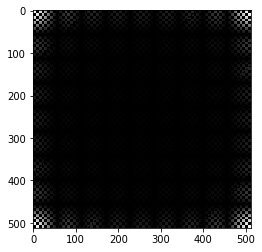

In [116]:
F_K[F_K<0] = 0
plt.imshow(np.abs(F_K), cmap='gray')

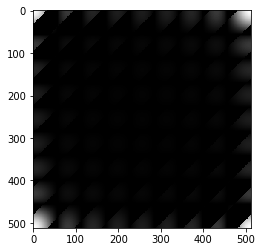

In [118]:
F_K[F_K<0] = 0
plt.imshow(np.abs(F_K), cmap='gray')

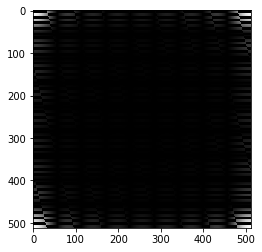

In [120]:
F_K[F_K<0] = 0
plt.imshow(np.abs(F_K), cmap='gray')

###

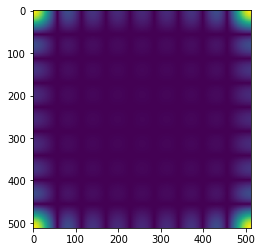

In [126]:
plt.imshow(np.abs(F_K))

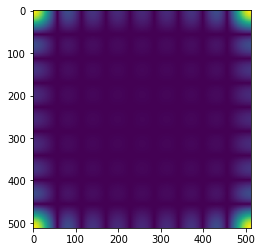

In [128]:
plt.imshow(np.abs(F_K))

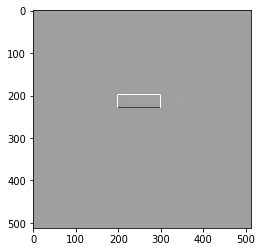

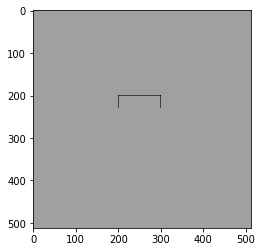

In [138]:
kLap = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
kLap_pad = np.zeros(im.shape)
offset = int((im.shape[0] - kLap.shape[0]) / 2)
kLap_pad[offset:offset + kLap.shape[0], offset:offset + kLap.shape[0]] = kLap
# kLap_pad[:kLap.shape[0], :kLap.shape[0]] = kLap

KLap = np.fft.fft2(kLap_pad)
D_Lap = KLap * F
# tmp = np.fft.ifft2(D_Lap)
tmp = np.fft.fftshift(np.fft.ifft2(D_Lap))
im_D_Lap = np.real(tmp)

plt.imshow(im_D_Lap, cmap='gray')

imLap = cv.filter2D(im.astype(np.float32), -1, kLap)
plt.figure()
plt.imshow(imLap, cmap='gray')

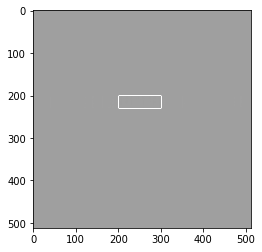

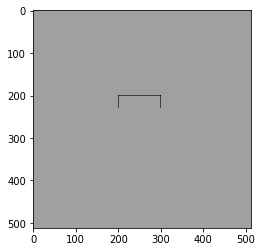

In [156]:
kLap = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
kLap_pad = np.zeros(im.shape)
offset = int((im.shape[0] - kLap.shape[0]) / 2)
# kLap_pad[offset:offset + kLap.shape[0], offset:offset + kLap.shape[0]] = kLap
kLap_pad[:kLap.shape[0], :kLap.shape[0]] = kLap

KLap = np.fft.fft2(kLap_pad)
D_Lap = KLap * F
# tmp = np.fft.ifft2(D_Lap)
tmp = np.fft.ifft2(D_Lap)
im_D_Lap = np.real(tmp)

plt.imshow(im_D_Lap, cmap='gray')

imLap = cv.filter2D(im.astype(np.float32), -1, kLap)
plt.figure()
plt.imshow(imLap, cmap='gray')

# 图像去模糊

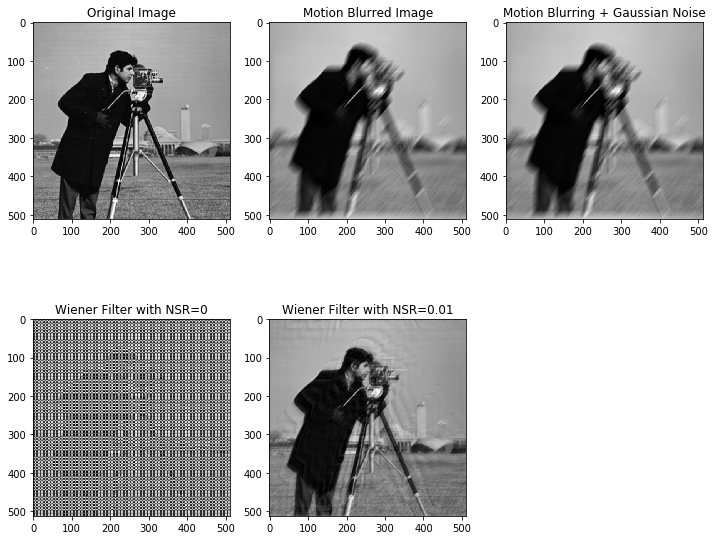

In [190]:
def wiener_filter(img, h, eps, NSR):
    """
    :param img: 图片
    :param h: 模糊函数
    :param NSR: 信噪比
    :return: 滤波后图像
    """
    img_fft = np.fft.fft2(img)
    h_fft = np.fft.fft2(h) + eps
    h_fft_square = np.abs(h_fft) ** 2
#     result = img_fft / h_fft * h_fft_square / (h_fft_square + NSR)
    result = np.conj(h_fft) / (h_fft_square + NSR)
    result = np.fft.ifft2(result * img_fft)
    return np.abs(np.fft.fftshift(result))

def motion_process(img, motion_length, motion_angle):
    im_shape = img.shape
    PSF = np.zeros(im_shape)
    center = ((im_shape[0] - 1) / 2, (im_shape[1] - 1) / 2)
    
    sin_val = np.sin(motion_angle * np.pi / 180)
    cos_val = np.cos(motion_angle * np.pi / 180)
    
    for i in range(motion_length):
        x_offset = round(sin_val * i)
        y_offset = round(cos_val * i)
#         print(center[0] - x_offset)
        PSF[int(center[0] - x_offset), int(center[1] + y_offset)] = 1
    PSF = PSF / PSF.sum()
    
    blurred = np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(PSF))
    blurred = np.abs(np.fft.fftshift(blurred))
    return blurred, PSF

def gaussian_noise(img, mu, sigma):
    noise_img = img.copy()
    noise_img += np.random.normal(mu, sigma, blurred.shape)
    return noise_img

image = data.camera()
LEN = 30
ANGLE = 50
blurred, PSF = motion_process(image, LEN, ANGLE)
blurred_gaussian = gaussian_noise(blurred, 0, 0.0001)

wiener_img1 = wiener_filter(blurred_gaussian, PSF, 1e-9, 0)
wiener_img2 = wiener_filter(blurred_gaussian, PSF, 0.00001, 0.01)

display = [image, blurred, blurred_gaussian,wiener_img1, wiener_img2]
label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filter with NSR=0','Wiener Filter with NSR=0.01']
fig = plt.figure(figsize=(12, 10))
for i in range(len(display)):
    fig.add_subplot(2,3, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])
plt.show()

# 振铃效应

图像处理中，对一幅图像进行滤波处理，若选用的频域滤波器具有陡峭的变化，则会使滤波图像产生“振铃”，所谓“振铃”，就是指输出图像的灰度剧烈变化处产生的震荡，就好像钟被敲击后产生的空气震荡。

解决方案：
    + 使用函数处理频率域滤波器边缘
    + 使用合适的滤波器，如
        + 高斯型滤波器
$$
            H(u,v)=exp(-\frac{D(u,v)^2}{2D_{0}^{2}})
$$
        + 一阶巴特沃斯型滤波器
$$
            H(u,v) = \frac{1}{1+[D(u,v)/D_0]^1}
$$

In [ ]:
def edge_taper(inputIm, gamma, beta):
    Nx = inputIm.shape[1]
    Ny = inputIm.shape[0]

    w1 = np.zeros((1, Nx), dtype=np.float32)
    w2 = np.zeros((Ny, 1), dtype=np.float32)

    pi = 3.1415926
    dx = 2 * pi / Nx
    x = -pi
    for i in range(Nx):
        w1[0, i] = 0.5*(np.tanh((x+gamma/2)/beta) - np.tanh((x-gamma/2)/beta))
        x = x + dx

    dy = 2.0 * pi / Ny
    y = -pi

    for i in range(Ny):
        w2[i, 0] = 0.5*(np.tanh((y+gamma/2)/beta) - np.tanh((y-gamma/2)/beta))
        y = y + dy
    w = w1 * w2

    return w, inputIm*w

# 图像形态学

## 膨胀与腐蚀

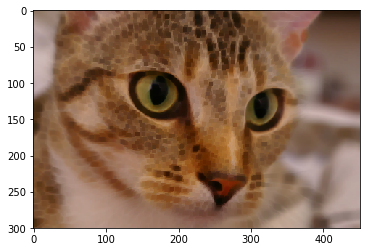

In [3]:
import cv2 as cv
import numpy as np
import argparse

max_elem = 2
max_kernel_size = 21
image = imageio.imread('imageio:chelsea.png')

# 腐蚀
def erosion(img, erosion_size, erosion_type=cv.MORPH_RECT):
    """
    :param erosion_type: 腐蚀类型 cv.MORPH_RECT cv.MORPH_CROSS cv.MORPH_ELLIPSE
    """
    element = cv.getStructuringElement(erosion_type, (2 * erosion_size + 1, 2 * erosion_size + 1), (erosion_size, erosion_size))
    erosion_dst = cv.erode(img, element)
    plt.imshow(erosion_dst, cmap='gray')

erosion(image, 2)

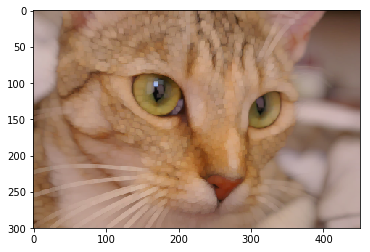

In [5]:
# 膨胀
def dilatation(img, dilatation_size, dilatation_type=cv.MORPH_RECT):
    """
    :param dilatation_type: 膨胀类型 cv.MORPH_RECT cv.MORPH_CROSS cv.MORPH_ELLIPSE
    """
    element = cv.getStructuringElement(dilatation_type, (2 * dilatation_size + 1, 2 * dilatation_size + 1), (dilatation_size, dilatation_size))
    dilatation_dst = cv.dilate(img, element)
    plt.imshow(dilatation_dst, cmap='gray')

dilatation(image, 2)

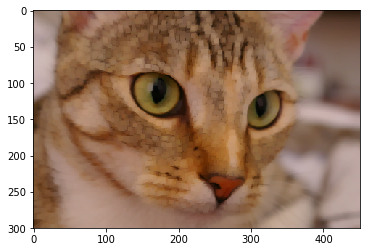

In [7]:
# 形态学操作
def morphology_operations(img, morph_size, morph_type=cv.MORPH_RECT, morph_operator=cv.MORPH_OPEN):
    """
    :param morph_type: 类型 cv.MORPH_RECT cv.MORPH_CROSS cv.MORPH_ELLIPSE
    :param morph_operator: 操作方式  cv.MORPH_OPEN, cv.MORPH_CLOSE, cv.MORPH_GRADIENT, cv.MORPH_TOPHAT, cv.MORPH_BLACKHAT
    cv.MORPH_OPEN = dilatation(erosion)
    cv.MORPH_CLOSE = erosion(dilatation)
    cv.MORPH_GRADIENT = dilatation - erosion
    cv.MORPH_TOPHAT = img - open
    cv.MORPH_BLACKHAT = close - img
    """
    element = cv.getStructuringElement(morph_type, (2 * morph_size + 1, 2 * morph_size + 1), (morph_size, morph_size))
    dst = cv.morphologyEx(img, morph_operator, element)
    plt.imshow(dst, cmap='gray')

morphology_operations(image, 2)

## Hit or Miss

Hit-miss算法步骤：  
    击中击不中变换是形态学中用来检测特定形状所处位置的一个基本工具。它的原理就是使用腐蚀；如果要在一幅图像A上找到B形状的目标，我们要做的是：  
+ 首先，建立一个比B大的模板W；使用此模板对图像A进行腐蚀，得到图像假设为Process1;  
+ 其次，用B减去W，从而得到V模板(W-B)；使用V模板对图像A的补集进行腐蚀，得到图像假设为Process2;  
+ 然后，Process1与Process2取交集；得到的结果就是B的位置。这里的位置可能不是B的中心位置，要视W-B时对齐的位置而异；  

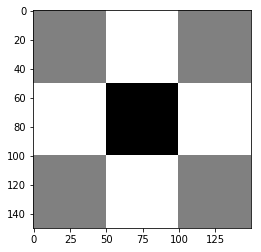

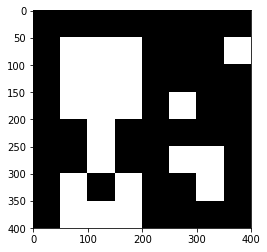

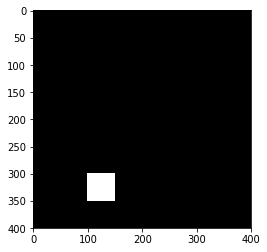

In [8]:
input_image = np.array((
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0, 0, 255],
    [0, 255, 255, 255, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 255, 0, 0],
    [0, 0, 255, 0, 0, 0, 0, 0],
    [0, 0, 255, 0, 0, 255, 255, 0],
    [0,255, 0, 255, 0, 0, 255, 0],
    [0, 255, 255, 255, 0, 0, 0, 0]), dtype="uint8")

kernel = np.array((
        [0, 1, 0],
        [1, -1, 1],
        [0, 1, 0]), dtype="int")

output_image = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel)

rate = 50
kernel = (kernel + 1) * 127
kernel = np.uint8(kernel)

kernel = cv.resize(kernel, None, fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
plt.imshow(kernel, cmap='gray')

input_image = cv.resize(input_image, None, fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
plt.figure()
plt.imshow(input_image, cmap='gray')

output_image = cv.resize(output_image, None , fx = rate, fy = rate, interpolation = cv.INTER_NEAREST)
plt.figure()
plt.imshow(output_image, cmap='gray')

## 五线谱提取

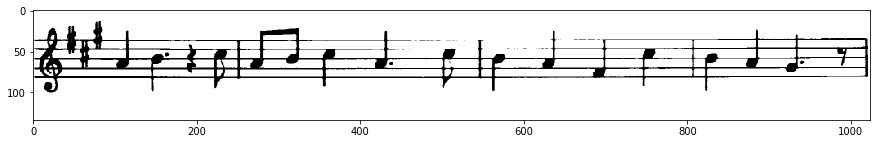

In [14]:
# load image
image = cv.imread('src.png', cv.IMREAD_COLOR)
plt.figure(figsize=(15,8))
plt.imshow(image)

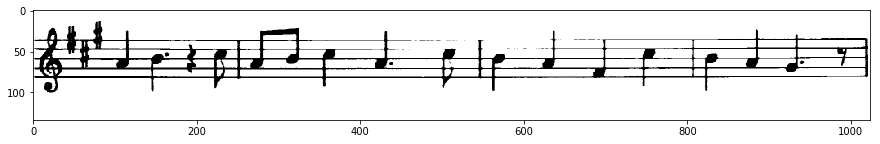

In [20]:
# gray
if len(image.shape) != 2:
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
else:
    gray = image
plt.figure(figsize=(15,8))
plt.imshow(gray, cmap='gray')

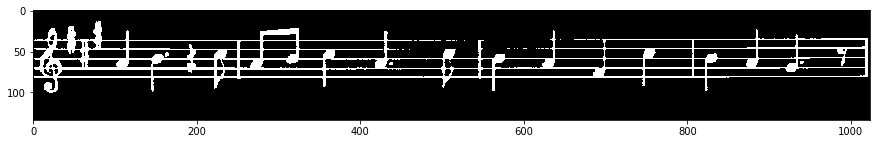

In [21]:
# to Binary image
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 15, -2)
plt.figure(figsize=(15,8))
plt.imshow(bw, cmap='gray')

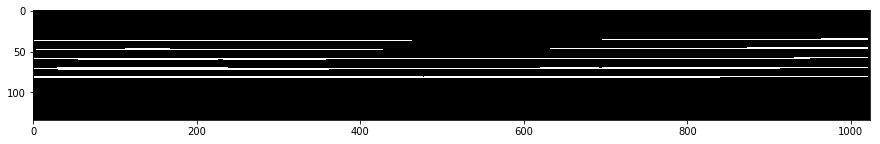

In [30]:
# 水平线提取
horizontal = np.copy(bw)
vertical = np.copy(bw)

cols = horizontal.shape[1]
horizontal_size = cols // 20
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))

horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
plt.figure(figsize=(15,8))
plt.imshow(horizontal, cmap='gray')

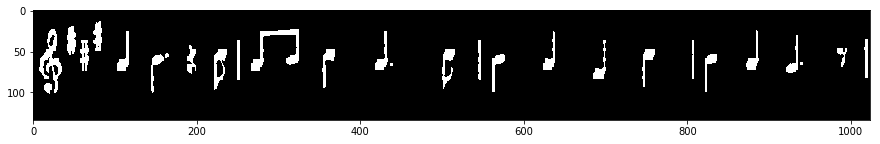

In [31]:
# 竖直线提取
rows = vertical.shape[0]
vertical_size = rows // 30

verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, vertical_size))

vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
plt.figure(figsize=(15,8))
plt.imshow(vertical, cmap='gray')

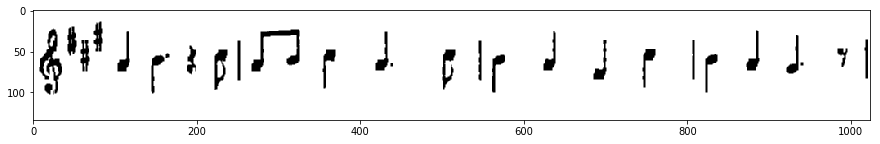

In [32]:
# 优化边缘
vertical = cv.bitwise_not(vertical)

edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 3, -2)
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)

smooth = np.copy(vertical)
smooth = cv.blur(smooth, (2, 2))
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]

plt.figure(figsize=(15,8))
plt.imshow(vertical, cmap='gray')